___

<a href='https://mainacademy.ua/'> <img src='https://mainacademy.ua/wp-content/uploads/2019/03/logo-main.png' alt = 'Хмм, щось з інтернетом'/></a>
___

# Module 8: Unsupervised learning

## Lab work 8



#### Мета: 

* навчитися використовувати моделі без учителем

### Завдання 1:

Опрацюйте файл `Groceries.csv`. Використовуючи алгоритм асоціативних зв'язків, знайдіть:
- зробіть описову статистику даного файлу
- ведіть топ-3 продукти, що продаються
- виведіть топ-2 пари продуктів, що продаються
- придумайте, як отриману інформацію можна використатти (опишіть в 3-4 реченнях)

In [65]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


from  sklearn.preprocessing import StandardScaler
from sklearn.preprocessing  import MinMaxScaler
from sklearn.model_selection import train_test_split

from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
from mlxtend.preprocessing import TransactionEncoder

## Чтение файла groceries (у меня он назван с ошибкой "groceriea")

In [46]:
groceries_v1 = []
with open('groceriea_txt.txt') as f:
    for line in f:
        groceries_v1.append(line.split(','))
        
for i in groceries_v1:
    i[-1] = i[-1].replace('\n', '')


# зробіть описову статистику даного файлу

In [99]:
# df для описательной статистики
df_for_stat = pd.DataFrame( np.arange(0, len(groceries_v1)), index =range(0, len(groceries_v1)))
df_for_stat['bill'] = groceries_v1
df_for_stat['items_count_for_bill'] = df_for_stat['bill'].apply(lambda x: len(x))

### Распределение товаров в чеке. Кол-во товаро в чеке. > В большинстве случаев в чеке по 4 товара. 

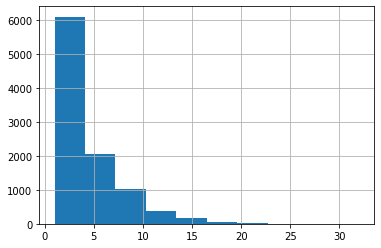

In [102]:
# Распределение товаров в чеке. Кол-во товаро в чеке. > В большинстве случаев в чеке по 4 товара. 
df_for_stat['items_count_for_bill'].hist()

### Топ 10 товаров по количеству чеков по ним (в текущем датафрейме).
### Это >> 'canned beer', 'soda', 'whole milk', 'bottled beer', 'rolls/buns'
НО, как станет известно далее, 'whole milk' является товаром, в связке с которым часто покупают другие товары. 

In [178]:
df1 = pd.DataFrame(df_for_stat.groupby(df_for_stat['bill_str'], as_index = False)['items_count_for_bill'].\
                   count().sort_values(by = 'items_count_for_bill',ascending = False))

df1.head()

,bill_str,items_count_for_bill
747,['canned beer'],260
5741,['soda'],156
6849,['whole milk'],121
520,['bottled beer'],120
4612,['rolls/buns'],109


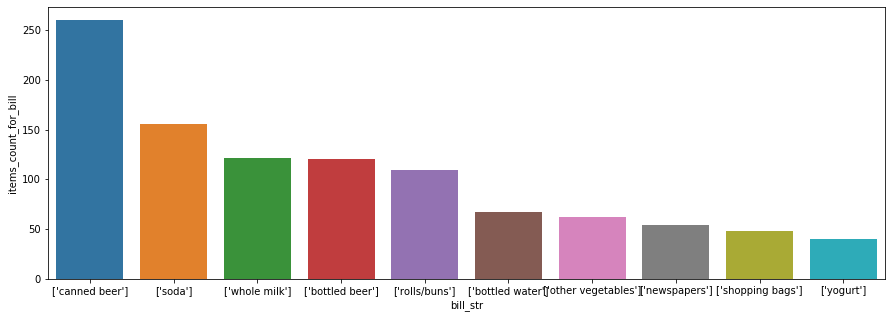

In [176]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'bill_str', y = 'items_count_for_bill', data = df1[0:10])

## Оработка данных и применение apriori

In [ ]:
# обработка данных

In [47]:
mlxtend_encoder = TransactionEncoder()
groceries_v1_array = mlxtend_encoder.fit(groceries_v1).transform(groceries_v1)
groceries_df = pd.DataFrame(groceries_v1_array.astype("int", copy = False), columns = mlxtend_encoder.columns_)
groceries_df.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# обработка данных и применение алгоритма  apriori

In [48]:
groceries_sup = apriori(groceries_df, min_support=0.009, use_colnames=True)
groceries_sup.head()

,support,itemsets
0,0.033452,(UHT-milk)
1,0.017692,(baking powder)
2,0.052466,(beef)
3,0.033249,(berries)
4,0.026029,(beverages)


# ведіть топ-3 продукти, що продаються

In [49]:
# ведіть топ-3 продукти, що продаються
groceries_sup.sort_values(by = 'support', ascending = False)[0:3]

# Лучше всего продаются 'whole milk', 'other vegetables', 'rolls/buns'

,support,itemsets
91,0.255516,(whole milk)
57,0.193493,(other vegetables)
70,0.183935,(rolls/buns)


### Лучше всего продаются 'whole milk', 'other vegetables', 'rolls/buns'

In [50]:
# применение association_rules
groceries_rules = association_rules(groceries_sup, metric="confidence", min_threshold=0.1)
groceries_rules
#association_rules(df, metric=’confidence’, min_threshold=0.8, support_only=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(baking powder),(whole milk),0.017692,0.255516,0.009253,0.522989,2.046793,0.004732,1.560725
1,(beef),(other vegetables),0.052466,0.193493,0.019725,0.375969,1.943066,0.009574,1.292416
2,(other vegetables),(beef),0.193493,0.052466,0.019725,0.101944,1.943066,0.009574,1.055095
3,(beef),(rolls/buns),0.052466,0.183935,0.013625,0.259690,1.411858,0.003975,1.102329
4,(root vegetables),(beef),0.108998,0.052466,0.017387,0.159515,3.040367,0.011668,1.127366
...,...,...,...,...,...,...,...,...,...
583,(tropical fruit),"(yogurt, whole milk)",0.104931,0.056024,0.015150,0.144380,2.577089,0.009271,1.103265
584,"(yogurt, whole milk)",(whipped/sour cream),0.056024,0.071683,0.010880,0.194192,2.709053,0.006864,1.152033
585,"(yogurt, whipped/sour cream)",(whole milk),0.020742,0.255516,0.010880,0.524510,2.052747,0.005580,1.565719
586,"(whole milk, whipped/sour cream)",(yogurt),0.032232,0.139502,0.010880,0.337539,2.419607,0.006383,1.298943


In [57]:
groceries_rules.sort_values(by = 'lift', ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
9,(berries),(whipped/sour cream),0.033249,0.071683,0.009049,0.272171,3.796886,0.006666,1.275461
10,(whipped/sour cream),(berries),0.071683,0.033249,0.009049,0.126241,3.796886,0.006666,1.106428
471,(pip fruit),"(tropical fruit, other vegetables)",0.075648,0.035892,0.009456,0.125000,3.482649,0.006741,1.101837
470,"(tropical fruit, other vegetables)",(pip fruit),0.035892,0.075648,0.009456,0.263456,3.482649,0.006741,1.254985
469,"(pip fruit, other vegetables)",(tropical fruit),0.026131,0.104931,0.009456,0.361868,3.448613,0.006714,1.402638
443,(curd),"(yogurt, whole milk)",0.053279,0.056024,0.010066,0.188931,3.372304,0.007081,1.163866
440,"(yogurt, whole milk)",(curd),0.056024,0.053279,0.010066,0.179673,3.372304,0.007081,1.154078
414,"(other vegetables, citrus fruit)",(root vegetables),0.028876,0.108998,0.010371,0.359155,3.295045,0.007224,1.390354
527,"(yogurt, other vegetables)",(whipped/sour cream),0.043416,0.071683,0.010168,0.234192,3.267062,0.007056,1.212206
529,(whipped/sour cream),"(yogurt, other vegetables)",0.071683,0.043416,0.010168,0.141844,3.267062,0.007056,1.114697


In [58]:
groceries_rules.sort_values(by = 'confidence', ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
409,"(yogurt, butter)",(whole milk),0.014642,0.255516,0.009354,0.638889,2.500387,0.005613,2.061648
413,"(root vegetables, citrus fruit)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059
493,"(root vegetables, tropical fruit)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999,0.008231,1.941244
441,"(yogurt, curd)",(whole milk),0.017285,0.255516,0.010066,0.582353,2.279125,0.005649,1.782567
438,"(other vegetables, curd)",(whole milk),0.017184,0.255516,0.009863,0.573964,2.246296,0.005472,1.747469
406,"(other vegetables, butter)",(whole milk),0.020031,0.255516,0.011490,0.573604,2.244885,0.006371,1.745992
562,"(root vegetables, tropical fruit)",(whole milk),0.021047,0.255516,0.011998,0.570048,2.230969,0.006620,1.731553
571,"(root vegetables, yogurt)",(whole milk),0.025826,0.255516,0.014540,0.562992,2.203354,0.007941,1.703594
568,"(root vegetables, whipped/sour cream)",(whole milk),0.017082,0.255516,0.009456,0.553571,2.166484,0.005091,1.667644
446,"(other vegetables, domestic eggs)",(whole milk),0.022267,0.255516,0.012303,0.552511,2.162336,0.006613,1.663694


## виведіть топ-2 пари продуктів, що продаються
придумайте, як отриману інформацію можна використатти (опишіть в 3-4 реченнях)

Не могу определиться. Обобщую выводы на основании топ продуктов по lift + по confidence 

In [61]:
groceries_rules.sort_values(by = 'lift', ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
9,(berries),(whipped/sour cream),0.033249,0.071683,0.009049,0.272171,3.796886,0.006666,1.275461
10,(whipped/sour cream),(berries),0.071683,0.033249,0.009049,0.126241,3.796886,0.006666,1.106428
471,(pip fruit),"(tropical fruit, other vegetables)",0.075648,0.035892,0.009456,0.125000,3.482649,0.006741,1.101837
470,"(tropical fruit, other vegetables)",(pip fruit),0.035892,0.075648,0.009456,0.263456,3.482649,0.006741,1.254985
469,"(pip fruit, other vegetables)",(tropical fruit),0.026131,0.104931,0.009456,0.361868,3.448613,0.006714,1.402638
443,(curd),"(yogurt, whole milk)",0.053279,0.056024,0.010066,0.188931,3.372304,0.007081,1.163866
440,"(yogurt, whole milk)",(curd),0.056024,0.053279,0.010066,0.179673,3.372304,0.007081,1.154078
414,"(other vegetables, citrus fruit)",(root vegetables),0.028876,0.108998,0.010371,0.359155,3.295045,0.007224,1.390354
527,"(yogurt, other vegetables)",(whipped/sour cream),0.043416,0.071683,0.010168,0.234192,3.267062,0.007056,1.212206
529,(whipped/sour cream),"(yogurt, other vegetables)",0.071683,0.043416,0.010168,0.141844,3.267062,0.007056,1.114697


In [62]:
groceries_rules.sort_values(by = 'confidence', ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
409,"(yogurt, butter)",(whole milk),0.014642,0.255516,0.009354,0.638889,2.500387,0.005613,2.061648
413,"(root vegetables, citrus fruit)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059
493,"(root vegetables, tropical fruit)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999,0.008231,1.941244
441,"(yogurt, curd)",(whole milk),0.017285,0.255516,0.010066,0.582353,2.279125,0.005649,1.782567
438,"(other vegetables, curd)",(whole milk),0.017184,0.255516,0.009863,0.573964,2.246296,0.005472,1.747469
406,"(other vegetables, butter)",(whole milk),0.020031,0.255516,0.011490,0.573604,2.244885,0.006371,1.745992
562,"(root vegetables, tropical fruit)",(whole milk),0.021047,0.255516,0.011998,0.570048,2.230969,0.006620,1.731553
571,"(root vegetables, yogurt)",(whole milk),0.025826,0.255516,0.014540,0.562992,2.203354,0.007941,1.703594
568,"(root vegetables, whipped/sour cream)",(whole milk),0.017082,0.255516,0.009456,0.553571,2.166484,0.005091,1.667644
446,"(other vegetables, domestic eggs)",(whole milk),0.022267,0.255516,0.012303,0.552511,2.162336,0.006613,1.663694


## Вывод

In [ ]:
Вывод: вместе хорошо продаются:
    - (berries)+ (whipped/sour cream) >> ягоды и сливки
    - (tropical fruit, other vegetables) + (pip fruit) >>  наверно, это тропические фрукты совместно с фруктами типа яблок.
    - (whole milk) + (yogurt, curd)/(other vegetables, curd)/(other vegetables, butter) >> молоко + другие молочные продукты. 
Т.е. совместно продfются обыденные продукты, которые часто употребляются и быстро расходуются. Не основные продукты питания. 
Типа продукты для перекусов. 

### Завдання 2:

Завантажте файл https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python
 
- Спробуйте провести кластеризацію, тобто виділити цільові групи, для яких можна впроваджувати певні маркетингові акції
- Опишіть отримані результати

In [66]:
df_customers0 = pd.read_csv('Mall_Customers_for Lab8.csv') # для итогового df
df_customers = pd.read_csv('Mall_Customers_for Lab8.csv')
df_customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


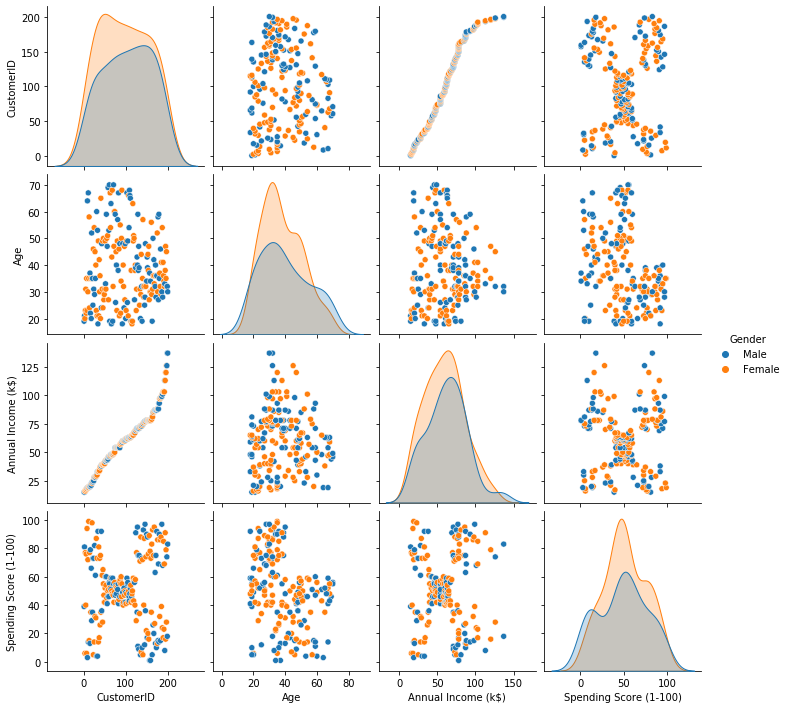

In [67]:
sns.pairplot(data = df_customers0, hue = 'Gender')

## Обработка данных

In [70]:
# dummies категориальных данных Gender Age. удаление исходных 'Gender', 'Age', 'CustomerID'
df_customers = df_customers.merge(pd.get_dummies(df_customers[['Gender']]), left_index = True, right_index = True)\
.merge(pd.get_dummies(df_customers['Age']), left_index = True, right_index = True)

df_customers.drop(['Gender', 'Age', 'CustomerID'], axis = 1, inplace = True)

In [71]:
# MinMaxScaler
# стандартизирую дискретные колонки и записываю в датафрейм.
minmaxcaler = MinMaxScaler()
minmaxcaler_df_customers = pd.DataFrame(minmaxcaler.fit_transform(df_customers), columns = df_customers.columns)
minmaxcaler_df_customers.head()

,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,18,19,20,21,22,23,...,59,60,63,64,65,66,67,68,69,70
0,0.000000,0.387755,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.816327,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.008197,0.051020,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.008197,0.775510,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.016393,0.397959,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Применение модели KMeans

In [72]:
km_minmax = KMeans(n_clusters = 5, random_state = 1)
km_minmax.fit_predict(minmaxcaler_df_customers)
km_minmax.labels_

df_customers0['class0_minmax'] = km_minmax.labels_
df_customers0.groupby(df_customers0['class0_minmax'])['Annual Income (k$)'].count()

class0_minmax
0    43
1    60
2    33
3    19
4    45
Name: Annual Income (k$), dtype: int64

In [73]:
df_users_result =  df_customers0.groupby(['class0_minmax', 'Gender']).agg({'Gender' : 'count', 'Annual Income (k$)' : ['mean', 'sum'],\
                                                           'Spending Score (1-100)' : ['mean', 'sum']})

#Средние показатели по группам 
df_users_result

Gender Annual Income (k$)       Spending Score (1-100)  \
                      count               mean   sum                   mean   
class0_minmax Gender                                                          
0             Male       43          63.116279  2714              26.023256   
1             Female     60          60.583333  3635              36.116667   
2             Female     33          43.696970  1442              65.333333   
3             Female     19          82.052632  1559              76.210526   
4             Male       45          61.377778  2762              70.000000   

                            
                       sum  
class0_minmax Gender        
0             Male    1119  
1             Female  2167  
2             Female  2156  
3             Female  1448  
4             Male    3150

## Визуальное представление данных

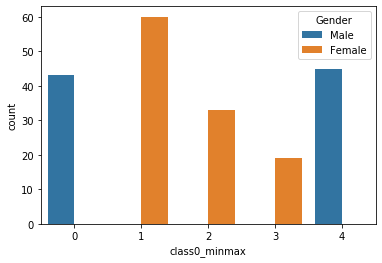

In [296]:
# Распределние по классам согласно полу.
sns.countplot(data = df_customers0, x = 'class0_minmax', hue = 'Gender')

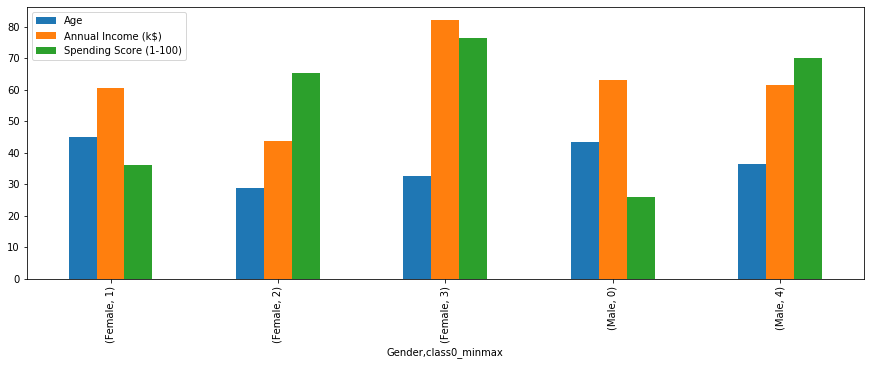

In [297]:
df_customers0.groupby(['Gender', 'class0_minmax'])['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean().\
plot(kind="bar", figsize=(15,5))

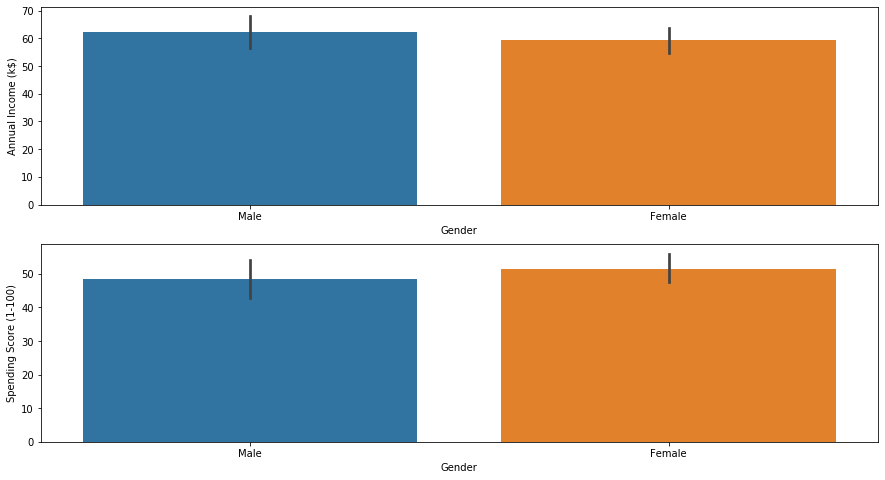

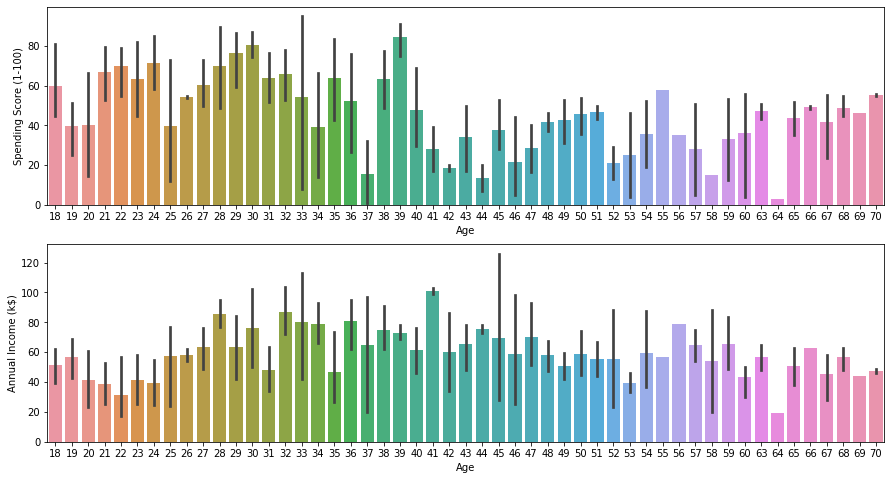

In [300]:
fig, ax = plt.subplots(2,1, figsize = (15,8))
sns.barplot(data = df_customers0, y = 'Annual Income (k$)', x = 'Gender', ax = ax[0])
sns.barplot(data = df_customers0, y = 'Spending Score (1-100)', x = 'Gender', ax = ax[1])


fig, ax = plt.subplots(2,1, figsize = (15,8))
sns.barplot(data = df_customers0, y = 'Spending Score (1-100)', x = 'Age', ax = ax[0])
sns.barplot(data = df_customers0, y = 'Annual Income (k$)', x = 'Age', ax = ax[1])

## Разделила графики и выводы по классам 0+4 и 1+2+3

### Оценка классов 0 и 4

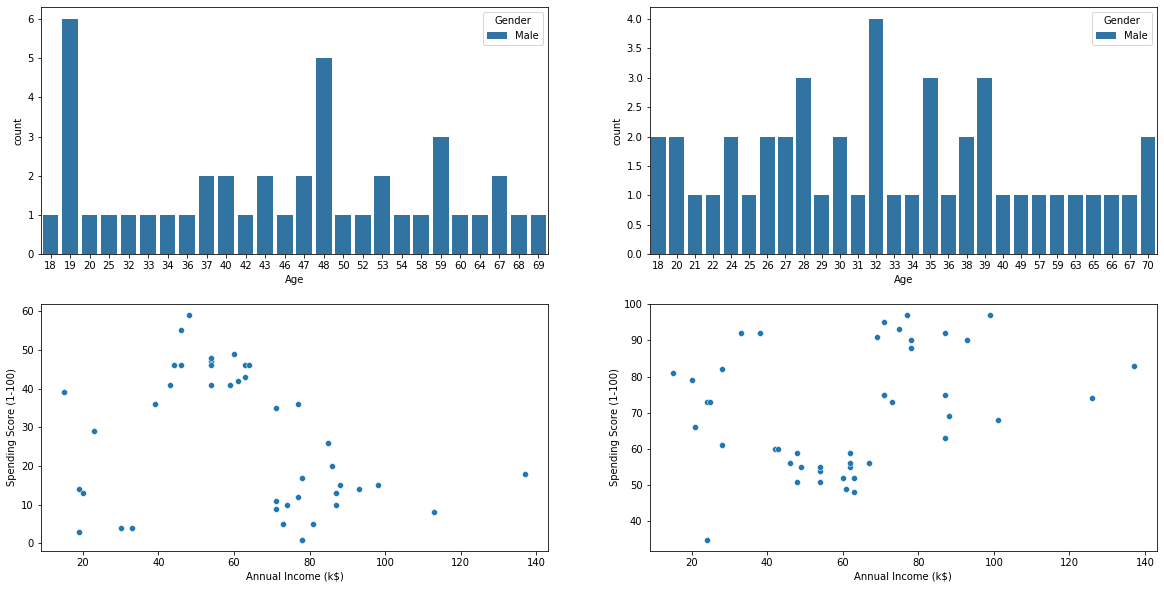

In [298]:
#Для оценки группы 0 и 4. 
fig, ax = plt.subplots(2,2, figsize = (20, 10))

sns.countplot(data = df_customers0[df_customers0['class0_minmax'] == 0], x = 'Age', hue = 'Gender', ax = ax[0,0])
sns.countplot(data = df_customers0[df_customers0['class0_minmax'] == 4], x = 'Age', hue = 'Gender', ax = ax[0,1])
sns.scatterplot(data = df_customers0[df_customers0['class0_minmax'] == 0], x = 'Annual Income (k$)', y = 'Spending Score (1-100)', ax = ax[1,0])
sns.scatterplot(data = df_customers0[df_customers0['class0_minmax'] == 4], x = 'Annual Income (k$)', y = 'Spending Score (1-100)',ax = ax[1,1])

### ВЫВОД (часть 1): 

In [ ]:
ВЫВОД:
Класы  0 и 4 состоят только с мужчин.  С примерно одинаковым средним и сумарным годовым доходом, но разницой в платёжном скоре. 
Класса 0 - низкий платёжный скор. Класс 4 - высокий платёжный скор. 
Обобщённая характеристика:
> Класс 0:  мужчины всех возрастов со ср.годовым доходом 40-90 k/$ и не-любят тратиться (платёжный скор от 0 до 60).
    Тут в зависимости от страны и других факторов: возможно несемейные люди, или люди склонные к накопительству.
> Класс  5: особенность - высокий платёжный скор - 60-100. Я бы тут выделила три под-группы. 
    >> первая: доходы в низкой категории 20-40 k/$ и крайне высокие расходы (платёжный скор от 60-90). 
        Возможно, шуточная-социальная категория "в общественном транспорте, нелеченые зубы, но с последним айфоном".
    >> вторая: средние доходы 40-70 k/$  и средний платёжный скор 45-60. 
        Наверно, люди адекватно оценивающие свои доходы, распределяют их и качественно контролируют свои покупки.
    >> третья: высокие доходы (75-140 k/$) и соответвенно высокие расходы (платёжный скор 60 -100). 

### Оценка классов 1, 2, 3

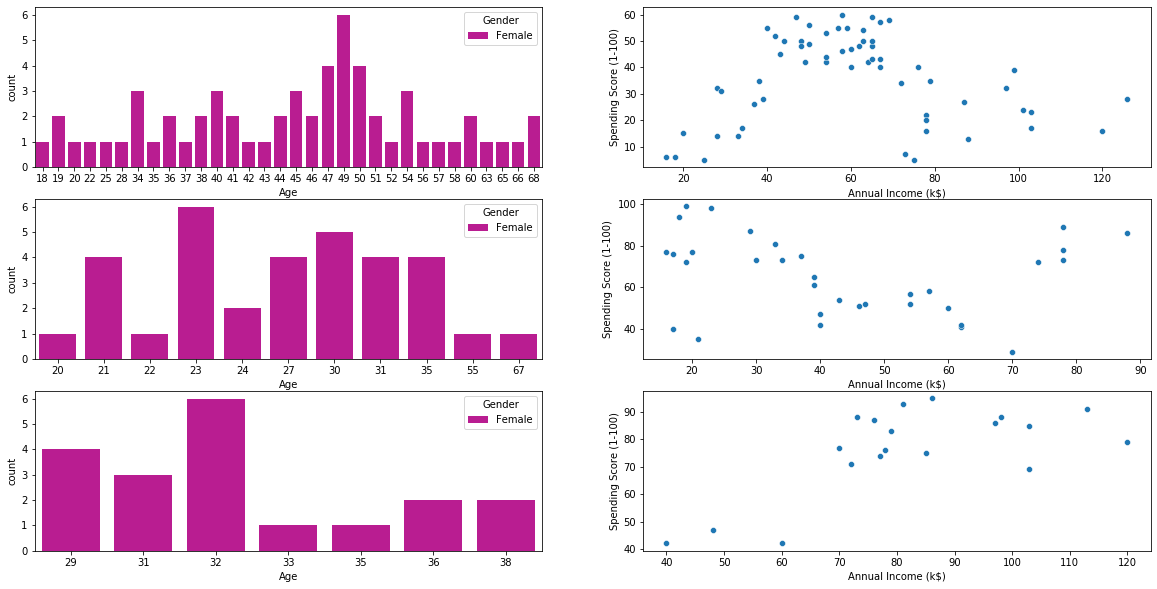

In [299]:
#Для оценки группы 0 и 4. 
fig, ax = plt.subplots(3,2, figsize = (20, 10))

sns.countplot(data = df_customers0[df_customers0['class0_minmax'] == 1], x = 'Age', hue = 'Gender', ax = ax[0,0], palette=['#d3039e'])
sns.scatterplot(data = df_customers0[df_customers0['class0_minmax'] == 1], x = 'Annual Income (k$)', \
                y = 'Spending Score (1-100)', ax = ax[0,1], palette=['#d3039e'])

sns.countplot(data = df_customers0[df_customers0['class0_minmax'] == 2], x = 'Age', hue = 'Gender', ax = ax[1,0], palette=['#d3039e'])
sns.scatterplot(data = df_customers0[df_customers0['class0_minmax'] == 2], x = 'Annual Income (k$)',\
                y = 'Spending Score (1-100)',ax = ax[1,1], palette=['#d3039e'])

sns.countplot(data = df_customers0[df_customers0['class0_minmax'] == 3], x = 'Age', hue = 'Gender', ax = ax[2,0], palette=['#d3039e'])
sns.scatterplot(data = df_customers0[df_customers0['class0_minmax'] == 3], x = 'Annual Income (k$)',\
                y = 'Spending Score (1-100)',ax = ax[2,1], palette=['#d3039e'])

### ВЫВОД  (часть 2):

In [ ]:
ВЫВОД:
Класс 1: женщины всех возрастов, заметно выделяются женщины 34-41 лет и 44-54 года. Тут три подгруппы:
        > подгруппа 1_1: самые низкие доходы 1-40 k/$ и самые низкие расходы (скор 1-35). 
        > подгруппа 1_2: средние доходы  40-75 k/$ и средние расходы (скор 40-60). 
        > подгруппа 1_3: высокий доходы 75-120 k/$ и минимальные расходы (скор 1-35).
    
Класс 2: женщины 25-35 лет. С уровнем дохода низким и средним (20-40 k/$  и  40-65 k/$) 
    и одновременно тратами выше среднего (платёжный скор 40-100).
    
Класс 3: женщины 29-38 лет. С высокими доходами 70-120k/$ и высокими расходами (платёжный скор 70-100).   

In [75]:
#Средние показатели по группам (продублироала). Для удобства понимания описания "женских классов".
df_users_result

Gender Annual Income (k$)       Spending Score (1-100)  \
                      count               mean   sum                   mean   
class0_minmax Gender                                                          
0             Male       43          63.116279  2714              26.023256   
1             Female     60          60.583333  3635              36.116667   
2             Female     33          43.696970  1442              65.333333   
3             Female     19          82.052632  1559              76.210526   
4             Male       45          61.377778  2762              70.000000   

                            
                       sum  
class0_minmax Gender        
0             Male    1119  
1             Female  2167  
2             Female  2156  
3             Female  1448  
4             Male    3150